# **Random Forests**

Los **Random Forest** son quizas la versión más simple de un modelo de ensamblaje: métodos de Machine Learning constituidos por la integración de otros algoritmos. En los Random Forest, este ensamblado se realiza combinando árboles de decisión, combinación que busca evitar el sobreajuste sin perder precisión.

# ***Bootstrapping* y *Bagging***

Hemos comentado que una de los grandes inconvenientes de los algoritmos de Árbol de Decisión es su tendencia hacia el sobreajuste, es decir, su incapaz de generalizar los buenos resultados obtenidos con las muestras de entrenamiento a nuevos datos no vistos con anterioridad. Ese hándicap puede ser eliminado con la flexibilidad que aportan los Random Forest.

La construcción del bosque se inicia creando diferentes subconjuntos a partir de los datos totales iniciales. Esta técnica se conoce como *bootstrapping* y se trata de un muestreo con remplazo, es decir, es posible que una misma instancia aparezca en varios subconjuntos de muestras. Una vez realizado el muestreo se procede a entrenar un algoritmo de Árbol de Decisión para cada muestra pero con una restricción que no teníamos en el método original: solo se permiten particiones en base a un subconjunto aleatorio de columnas. En una versión alternativa de los Random Forest, los *Extreme Random Trees*, genera aleatoriamente varios criterios de partición para cada variable, seleccionando el mejor de ellos. Un forma de reducir sobreajuste a costa de la precisión.

Una vez entrenados cada uno de los algoritmos podemos hacer predicciones, las culaes pasan por todos los árboles. La clasificación final se realiza simplemente por votación o por media en caso de tratarse de un regresión.

¿Y si en vez de entrenar un algoritmo entrenamos varios de ellos y tomamos como resultado el valor mayoritario? Esta meta-estrategia es conocida como *bagging* y combina el muestreo con remplazo (*bootstrapping*) con la agregación conjunta final. Ya hemos visto que es el método que utiliza Random Forest, aunque realmente puede aplicarse a multitud de algoritmos de Machine Learning. Cada uno de los árboles del Random Forest se entrena totalmente independiente del resto. La estimación final para una muestra (llamada *agregación*) es simplemente el voto mayoritario de todos los árboles o, como opción por defecto en ScikitLearn, la probabilidad dad por cada árbol ponderada por el número de muestras. En caso de tratarse de una tarea de regresión se utiliza la media de todos los árboles.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1xYAhCr4mCc6Y1Fk8LYIew3s6aE9WUNMw" width="600">

Como hemos comentado antes, en Random Forest utilizamos *bootstrapping*: cada árbol del bosque se entrena con un subconjunto aleatorio del conjunto de datos original, creado mediante muestreo con reemplazo. Esto significa que algunos ejemplos del conjunto de datos original pueden aparecer varias veces en el subconjunto, mientras que otros pueden no aparecer en absoluto. Las muestras que no aparecen en el subconjunto de un árbol en particular se denominan *Out-Of-Bag* (fuera de bolsa). Estos ejemplos no se utilizan para entrenar ese árbol específico y, por lo tanto, pueden usarse para evaluar su rendimiento. No deja de ser una suerte de Validación Cruzada. El rendimiento calculado sobre estas muestras fuera del conjunto de entrenamiento se basa en la métrica de precisión y se conoce como *Out-Of-Bag Error* (OOB Error).

# **Interpretación del modelo**

Si hemos entendido bien cómo funciona un Árbol de Decisión, nos daremos cuenta que las variables/columnas que son antes seleccionadas para realizar las particiones, son las que mejor dividen los datos y por tanto las más discriminativas. Ya hemos comentado como el Random Forest solo aparece un subconjunto de características en cada árbol. Pero al realizar pruebas con muchos árboles, podemos realizar una estimación de la importancia de las variables en la clasificación/predicción. Promediando la profundidad a la que aparecen de media ciertas características, Random Forest es capaz de devolvernos una estimación de su importancia. Sin embargo, estas estimaciones suelen sesgarse en favor de variables numéricas y su interpretación debe hacerse con cuidado.

# **Guía de uso de Random Forest**

Como ensamblaje de Árboles de Decisión que son, los Random Forest comparten muchas de sus mismas ventajas. Su flexibilidad para tareas de regresión y clasificación, el tratamiento automático de valores faltantes, el manejo de variables categóricas y numéricas sin necesidad de preprocesamiento intenso, su resistencia al ruido y el desbalanceo de clases o su capacidad para capturar relaciones no lineales en los datos son algunas de sus principales puntos fuertes. A estas ventajas heredadas de los Árboles de Decisión se suman aquellas que resultan de su contitución como meta-algoritmos de ensamblaje: mayor precisión y robustez. Si por algo destacan los Random Forest es su capacidad de esquivar el sobreajuste inherente a los Árboles de Decisión, así como ser igualmente menos sensibles a outliers y capturar mayor varianza de los datos de muestra.

Sin embargo, precisamente por este mismo ensamblaje, los Random Forest pierden la mayor virtud de los Árboles de Decisión: su interpretabilidad. Además y como es de esperar, el entrenamiento combinado de muchos árboles de decisión supone también más tiempo y mayores recursos de computación.

Estos son los principales meta-parámetros de un Random Forest:

- `n_estimators`: número de estimadores, es decir, Árboles de Decisión. Aumentando los estimadores mejoramos en precisión, pero también en tiempo de computación. Un número mayor de estimadores mejora el rendimiento hasta un punto crítico en el que no hay mejora en aumentar el número de árboles.
- `min_samples_split`: número mínimo de muestras necesarias para dividir un nodo. Un valor más alto puede evitar el sobreajuste. Valores más bajos implican el desarrollo total del árbol.
- `max_features`: número máximo de variables/columnas a utilizar en la selección aleatoria. Menos características implica mayor diversidad de árboles y mejor manejo del sobreajuste. Suelen indicarse como la raiz o el logaritmo del total de variables.
- `max_depth`: profundidad máxima del árbol. Controla la profundidad del árbol ayuda a prevenir el sobreajuste. Los árboles se desarrollan hasta que cada hoja contenga menos de `min_samples_split` muestras. Se recomienda un valor `None` para que el parámetro sea controlado por `min_samples_split`.

# **Análisis del DataFrame**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns

url='https://drive.google.com/file/d/1btCzqdC5EHUdpJbICCdouOUAJQukx3mM/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

data.head(6)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1


In [ ]:
data.shape

(54035, 9)

In [ ]:
list_columns = data.columns.tolist()

num_columns = data.select_dtypes(include=["int64","float64"]).columns.tolist()
print("Columnas numéricas: ", num_columns)

cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas: ", cat_columns)

Columnas numéricas:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']
Columnas categóricas:  []


In [ ]:
target_column = "class"

pred_columns = [col for col in list_columns if col != target_column]
num_pred_columns = [col for col in pred_columns if col in num_columns]
cat_pred_columns = [col for col in pred_columns if col in cat_columns]
print("Columnas predictoras: ", pred_columns)
print("Columnas numéricas predictoras: ", num_pred_columns)
print("Columnas categóricas predictoras: ", cat_pred_columns)

Columnas predictoras:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
Columnas numéricas predictoras:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']
Columnas categóricas predictoras:  []


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
target_classes = data[target_column].unique().tolist()

In [ ]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

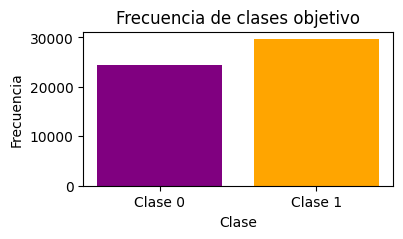

In [ ]:
class_counts = data[target_column].value_counts()
plt.figure(figsize=(4, 2))
plt.bar(class_counts.index, class_counts.values, color=['orange', 'purple'])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clases objetivo')
plt.xticks([0, 1], ['Clase 0', 'Clase 1'])
plt.show()

# **Clasificación binaria con Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# CREACIÓN DEL PIPELINE CON SVMs
model = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42, max_depth=None, oob_score=True)) # Random Forest para tareas de clasificación.
])

In [ ]:
# DIVISIÓN ENTRE COLUMNAS PREDICTIVAS Y OBJETIVO
# Separar colunas predictoras de columna objetivo
X = data.drop(columns=target_column)
y = data[target_column]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# DIVISIÓN ENTRE DATOS DE ENTRENAMIENTO Y DATOS DE TESTEO
# Seleccionamos una proporción de 80% de los datos para entrenamiento y 20% para el testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamaño datos de entrenamiento:", X_train.shape)
print("Tamaño datos de testeo:", X_test.shape)

Tamaño datos de entrenamiento: (43228, 8)
Tamaño datos de testeo: (10807, 8)


In [ ]:
# CONFIGURACIÓN DE LA BÚSQUEDA DE HIPERPARÁMETROS
# Configurar la búsqueda por validación cruzada para encontrar el mejor valor de alpha
metaparameter_list = ['classifier__max_features', 'classifier__min_samples_split']
param_grid = {
    metaparameter_list[0]: ['sqrt', 'log2', None], # Las opciones es la raíz
    metaparameter_list[1]: [2, 5, 10],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, verbose = 1, scoring='f1_weighted')

In [ ]:
from scipy.stats import mode

# BÚSQUEDA DE HIPERPARÁMETROS CON VALIDACIÓN ANIDADA.
# Este paso es independiente del entrenamiento posterior, pero es recomendable para evaluar la variabilidad de los modelos en cuanto a evaluación y selección de hiperparámetros.
n_splits = 5
outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
best_params_list = []
best_scores = []

# Aquí estamos haciendo una Validación Cruzada manualmente. En cada iteración (tantas como número de folds indicados) se calculará un GridSearchCV
# con el conjunto de entrenamiento seleccionado en ese fold.
for train_index, test_index in outer_cv.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    # Ejecutar GridSearchCV
    grid_search.fit(X_train_fold, y_train_fold)

    # Almacenar los mejores parámetros y los mejores resultados en cada split
    best_params_list.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

# Un bucle por fold, indicando el hiperparámetro óptimo y la mejor métrica de error de esa iteración.
for split in range(n_splits):
  for metaparameter in metaparameter_list:
    value = best_params_list[split][metaparameter]
    if isinstance(value, (int, float)):
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {round(value, 3)}')
    else:
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {value}')
  print(f"Mejor f1-Score ponderada en el fold {split}: {np.round(best_scores[split],2)}\n")

# Un bucle para los estadísticos de cada hiperparámetro
for metaparameter in metaparameter_list:
  values = [value[metaparameter] for value in best_params_list] # Recogemos los diferentes valores que nos devuelve cada fold
  if isinstance(values[0], (int, float)):
    mean = sum(values) / len(values) # Calculamos la media
    std = np.sqrt(sum((value - mean) ** 2 for value in values) / len(values)) # Calculamos la Desviación Típica
    print(f'Promedio de las puntuaciones {metaparameter} en VC anidada: {round(mean,3)}')
    print(f'Desviación Típica de las puntuaciones {metaparameter} en VC anidada: {round(std,3)}\n')
  else:
    unique_values, counts = np.unique(values, return_counts=True) # Valores y su frecuencia en values
    max_index = np.argmax(counts) # Índice del valor con mayor frecuencia
    mode = unique_values[max_index]
    count = counts[max_index]
    print(f'Moda de las puntuaciones {metaparameter} en VC anidada: {mode}')
    print(f'Frecuencia de la moda de las puntuaciones {metaparameter} en VC anidada: {count}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# BÚSQUEDA DE HIPERPARÁMETROS SIN VALIDACIÓN ANIDADA
# Entrenamos ahora con GridSearchCV sin anidar.
grid_search.fit(X_train, y_train)

# Mostrar mejor puntuación y los mejores parámetros. Podemos compararlos a aquellos valores obtenidos en la validación cruzada anidada.
for metaparameter in metaparameter_list:
  value = grid_search.best_params_[metaparameter]
  if isinstance(value, (int, float)):
    print(f'Mejor puntuación del {metaparameter} en VC anidada: {round(grid_search.best_params_[metaparameter],3)}')
  else:
    print(f'Mejor valor del {metaparameter} en VC anidada: {value}')
print("Mejor F1-Score:", np.round(grid_search.best_score_,2))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejor valor del classifier__max_features en VC anidada: sqrt
Mejor puntuación del classifier__min_samples_split en VC anidada: 5
Mejor F1-Score: 0.99


In [ ]:
# TESTEO DEL MODELO
# Recoger el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# EVALUACIÓN DEL MODELO
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
conf_matrix = confusion_matrix(y_test, y_pred)
tree_model = best_model.named_steps['classifier']
oob_score = tree_model.oob_score_

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Sensibilidad:", recall)
print("F1 Score:", f1)
print(f"OOB Score: {oob_score:.2f}")
print("Matriz de Confusión:\n", conf_matrix)

Exactitud: 0.99
Precisión: 0.99
Sensibilidad: 0.99
F1 Score: 0.99
OOB Score: 0.99
Matriz de Confusión:
 [[4827   53]
 [  48 5879]]


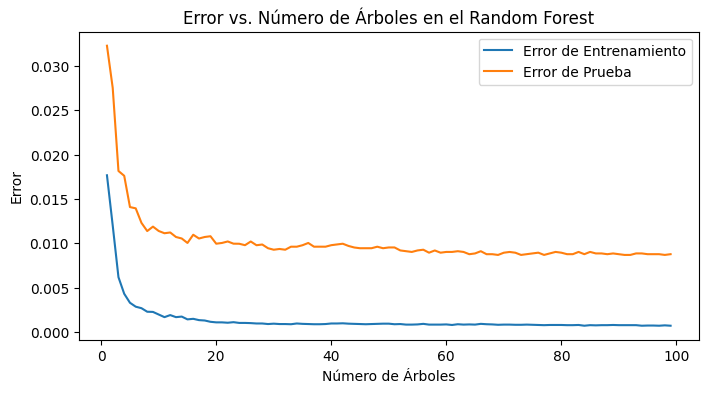

In [ ]:
# LOCALIZACIÓN DEL PUNTO CRÍTICO
n_estimators_range = range(1, 101) # Rango en el número de estimadores a probar
train_errors = []
test_errors = []

# Extraer los mejores hiperparámetros
best_max_features = grid_search.best_params_['classifier__max_features']
best_min_samples_split = grid_search.best_params_['classifier__min_samples_split'] # Metaparámetros obtenido del mejor modelo obtenido en el GridSearch

# Este bucle entrena y evalua un Random Forest, cada uno con un número distinto de estimadores.
for n in n_estimators_range:
    clf = RandomForestClassifier(
        n_estimators=n,
        max_features = best_max_features,
        min_samples_split = best_min_samples_split,
        random_state=42,
    )
    clf.fit(X_train, y_train)

    # Obtenemos la medida del error, tanto para las muestras de entrenamiento como de testeo.
    train_errors.append(1 - f1_score(y_train, clf.predict(X_train)))
    test_errors.append(1 - f1_score(y_test, clf.predict(X_test)))

# Graficar los errores de entrenamiento y prueba
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_range, train_errors, label='Error de Entrenamiento')
plt.plot(n_estimators_range, test_errors, label='Error de Prueba')
plt.xlabel('Número de Árboles')
plt.ylabel('Error')
plt.title('Error vs. Número de Árboles en el Random Forest')
plt.legend()
plt.show()

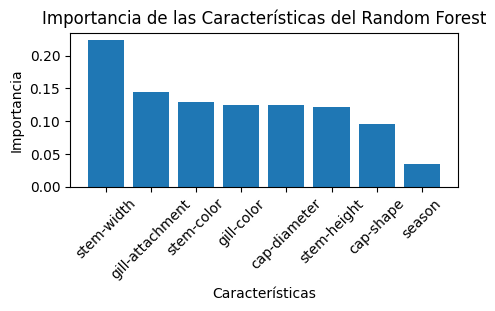

In [ ]:
# INTERPRETACIÓN DEL MODELO
# Extraemos las métricas de relevancia de cara característica.
importances = tree_model.feature_importances_
# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'feature': pred_columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
# Graficar la importancia de las características
plt.figure(figsize=(5, 2))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características del Random Forest')
plt.xticks(rotation=45)
plt.show()